In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
df = pd.read_csv("/content/drive/MyDrive/Bengaluru_House_Data.csv")

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.groupby('area_type').agg({'area_type':'count','price':'mean'})

,area_type,price
area_type,,
Built-up Area,2418,104.285498
Carpet Area,87,89.502356
Plot Area,2025,208.495486
Super built-up Area,8790,92.971757


In [ ]:
df.groupby('area_type').agg({'area_type':'count','price':'min'})

,area_type,price
area_type,,
Built-up Area,2418,9.00
Carpet Area,87,13.00
Plot Area,2025,8.44
Super built-up Area,8790,8.00


In [ ]:
df.groupby('area_type').agg({'area_type':'count','price':'max'})

,area_type,price
area_type,,
Built-up Area,2418,2050.0
Carpet Area,87,500.0
Plot Area,2025,3600.0
Super built-up Area,8790,2912.0


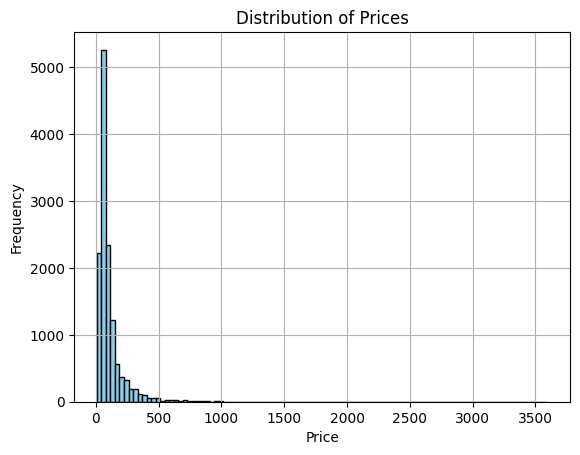

In [ ]:
plt.hist(df['price'], bins=100, edgecolor='black', color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df = df.drop(['area_type','society','availability'],axis='columns')

In [ ]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [ ]:
df = df.dropna()

In [ ]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [ ]:
# Fixing size column
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [ ]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-13-f8b9a4bb80b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
df['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [ ]:
df.drop(['size'],axis='columns',inplace=True)

<ipython-input-15-bdceeca134f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['size'],axis='columns',inplace=True)


In [ ]:
# We can tell that these values are 100% errors
df[df.bhk>20]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [ ]:
df[df.bhk>20].index

Index([1718, 4684], dtype='int64')

In [ ]:
df.drop(df[df.bhk>20].index,inplace=True)

<ipython-input-18-331e6188cd97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df.bhk>20].index,inplace=True)


In [ ]:
# Fixing total_sqft column
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

df[~df['total_sqft'].apply(is_float)].head(20)
# Found various kinds of values all in the wrong format

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,2


In [ ]:
a = '2100 - 2850'
b = a.split(' - ')
c = (int(b[0])+int(b[1]))/2

In [ ]:
c

2475.0

In [ ]:
def convert_to_sqft(x):
  tokens = x.split(' - ')
  if len(tokens) == 2:
    return ((float(tokens[0]))+(float(tokens[1])))/2
  try:
    return float(x)
  except:
    return x

In [ ]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)

<ipython-input-23-0d5248206aa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(convert_to_sqft)


In [ ]:
df[~df['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,balcony,price,bhk
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.50,1
775,Basavanagara,1000Sq. Meter,2.0,1.0,93.00,1
1019,Marathi Layout,5.31Acres,1.0,0.0,110.00,1
1086,Narasapura,30Acres,2.0,2.0,29.50,2
1400,Chamrajpet,716Sq. Meter,9.0,1.0,296.00,9
1712,Singena Agrahara,1500Sq. Meter,3.0,1.0,95.00,3
1743,Hosa Road,142.61Sq. Meter,3.0,1.0,115.00,3
1821,Sarjapur,1574Sq. Yards,3.0,1.0,76.00,3
2881,Volagerekallahalli,117Sq. Yards,2.0,2.0,38.00,2
3228,Dodda Banaswadi,3040Sq. Meter,5.0,1.0,140.00,5


In [ ]:
a = '716Sq. Meter'
b = a.split('Sq. Meter')
b

['716', '']

In [ ]:
def sqmt_to_sqft(x):
  try:
    tokens = x.split('Sq. Meter')
    return float(tokens[0])*10.76
  except:
    return x

In [ ]:
df.iloc[30]

,33
location,Raja Rajeshwari Nagar
total_sqft,1693.0
bath,3.0
balcony,3.0
price,57.39
bhk,3


In [ ]:
df['total_sqft'] = df['total_sqft'].apply(sqmt_to_sqft)

<ipython-input-28-9a2ea08bf6ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(sqmt_to_sqft)


In [ ]:
df[~df['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,balcony,price,bhk
1019,Marathi Layout,5.31Acres,1.0,0.0,110.0,1
1086,Narasapura,30Acres,2.0,2.0,29.5,2
1821,Sarjapur,1574Sq. Yards,3.0,1.0,76.0,3
2881,Volagerekallahalli,117Sq. Yards,2.0,2.0,38.0,2
3285,Whitefield,500Sq. Yards,4.0,2.0,378.0,4
5453,Kannur,3Cents,6.0,3.0,75.0,6
5537,Frazer Town,188.89Sq. Yards,3.0,1.0,180.0,3
5668,Judicial Layout,45Sq. Yards,6.0,3.0,400.0,5
5708,Jigani,133.3Sq. Yards,3.0,2.0,160.0,4
6268,Chickpet,122Sq. Yards,2.0,0.0,48.0,2


In [ ]:
def sqyrd_to_sqft(x):
  try:
    tokens = x.split('Sq. Yards')
    return float(tokens[0])*9.0
  except:
    return x

In [ ]:
df['total_sqft'] = df['total_sqft'].apply(sqyrd_to_sqft)

<ipython-input-31-1f9ff7279a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(sqyrd_to_sqft)


In [ ]:
df

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [ ]:
# Converted most error total_sqft values, going to return the rest as None now
df[~df['total_sqft'].apply(is_float)].head(20)

,location,total_sqft,bath,balcony,price,bhk
1019,Marathi Layout,5.31Acres,1.0,0.0,110.0,1
1086,Narasapura,30Acres,2.0,2.0,29.5,2
5453,Kannur,3Cents,6.0,3.0,75.0,6
6333,Harohalli,2.09Acres,2.0,0.0,200.0,2
6552,5 Bedroom Farm House in Lakshmipura,24Guntha,6.0,2.0,550.0,5
7001,Thyagaraja Nagar,1500Cents,6.0,2.0,290.0,8
7334,Kanakpura Road,2Acres,1.0,0.0,125.0,1
7607,Bommenahalli,15Acres,3.0,1.0,217.0,3
7726,Kanakpura Road,1.26Acres,1.0,0.0,125.0,1
9423,Ramamurthy Nagar,1Grounds,1.0,1.0,48.0,1


In [ ]:
def convert_to_float(x):
  try:
    return float(x)
  except:
    return None

In [ ]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_float)

<ipython-input-35-5d7f203e6d7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].apply(convert_to_float)


In [ ]:
df

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [ ]:
df.dropna(inplace=True)

<ipython-input-37-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [ ]:
# Dropped the unchanged total_sqft values and now the column is fixed with only float values
df

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [ ]:
# Seems like price is looking fine
df[~df['price'].apply(is_float)].head(20)

,location,total_sqft,bath,balcony,price,bhk


## Feature Engineering

In [ ]:
# Going to create a price_per_sqft columns , very important in house price predictions
df['price_per_sqft'] = df['price']*100000/df['total_sqft'] # multiplying price into 1,00,000 because price in lakhs

<ipython-input-40-5aff3077c1a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price']*100000/df['total_sqft'] # multiplying price into 1,00,000 because price in lakhs


In [ ]:
df

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [ ]:
# Lets review the location column
len(df['location'].unique())
# 1259 locations is too many

1259

In [ ]:
# Going to cluster some locations into 'Other' type
df['location'] = df['location'].apply(lambda x: x.strip()) # Just in case removing all space that might be there
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats[:30]

<ipython-input-43-83fd90588f8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df['location'].apply(lambda x: x.strip()) # Just in case removing all space that might be there


,location
location,
Whitefield,515
Sarjapur Road,372
Electronic City,302
Kanakpura Road,259
Thanisandra,234
Yelahanka,206
Uttarahalli,186
Hebbal,173
Raja Rajeshwari Nagar,168


In [ ]:
loc_less_than_15 = location_stats[location_stats<=15]
loc_less_than_15

,location
location,
Nagavarapalya,15
Varthur Road,15
Mallasandra,15
Kasturi Nagar,15
Chamrajpet,15
...,...
Kanakapura Rod,1
Kanakapura Main Road,1
Kanakapura Road,1


In [ ]:
df['location'] =df['location'].apply(lambda x: 'other' if x in loc_less_than_15 else x)

<ipython-input-45-2a90a210c98d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] =df['location'].apply(lambda x: 'other' if x in loc_less_than_15 else x)


In [ ]:
# From 1259 to 174 locations
len(df.location.unique())

174

## Outlier Detection

When it comes to outlier detection it becomes tricky and not necessarily the same process in every project because you will need domain knowledge on the data you are working with.

Eg: In real estate you would need to ask someone what is the avg sqft of a bedroom in XXX country.

In [ ]:
df['sqft_per_bedroom'] = df['total_sqft']/df['bhk']

<ipython-input-47-7023cb44e58a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sqft_per_bedroom'] = df['total_sqft']/df['bhk']


In [ ]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
count,12695.000000,12695.000000,12695.000000,12695.000000,12695.000000,1.269500e+04,12695.000000
mean,1520.085222,2.612446,1.585191,105.941157,2.732020,6.879938e+03,573.102799
std,1233.585045,1.159327,0.816639,131.664854,1.129211,2.262500e+04,406.191568
min,5.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02,0.714286
25%,1100.000000,2.000000,1.000000,49.000000,2.000000,4.241109e+03,473.333333
50%,1260.000000,2.000000,2.000000,70.000000,3.000000,5.375723e+03,550.000000
75%,1640.000000,3.000000,2.000000,115.000000,3.000000,7.143865e+03,622.500000
max,52272.000000,15.000000,3.000000,2912.000000,14.000000,2.300000e+06,26136.000000


In [ ]:
# A general way to detect outliers is by using the Inter Quantile Range
Q1 = df.sqft_per_bedroom.quantile(0.25)
Q3 = df.sqft_per_bedroom.quantile(0.75)
Q1,Q3

(473.3333333333333, 622.5)

In [ ]:
IQR = Q3-Q1
IQR

149.16666666666669

In [ ]:
lower_limit = Q1 = 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(223.75000000000003, 846.25)

In [ ]:
df1 = df[(df.sqft_per_bedroom>=lower_limit) & (df.sqft_per_bedroom<=upper_limit)]

In [ ]:
df1

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,528.000000
1,other,2600.0,5.0,3.0,120.00,4,4615.384615,650.000000
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,480.000000
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,507.000000
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,600.000000
...,...,...,...,...,...,...,...,...
13313,Uttarahalli,1345.0,2.0,1.0,57.00,3,4237.918216,448.333333
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245,571.666667
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926,690.600000
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136,570.500000


## Important Outlier Detection

Going through the dataset you will notice that some 2BHK apartements are more expensive than 3BHK apartements with the same total_sqft.

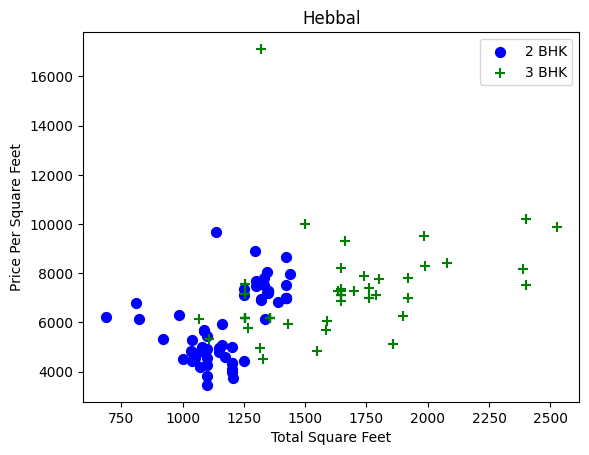

In [ ]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]
  plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
  plt.xlabel('Total Square Feet')
  plt.ylabel('Price Per Square Feet')
  plt.title(location)
  plt.legend()

plot_scatter_chart(df1,'Hebbal')


In [ ]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

  return df.drop(exclude_indices,axis='index')

df2 = remove_bhk_outliers(df1)
df2.shape

(7569, 8)

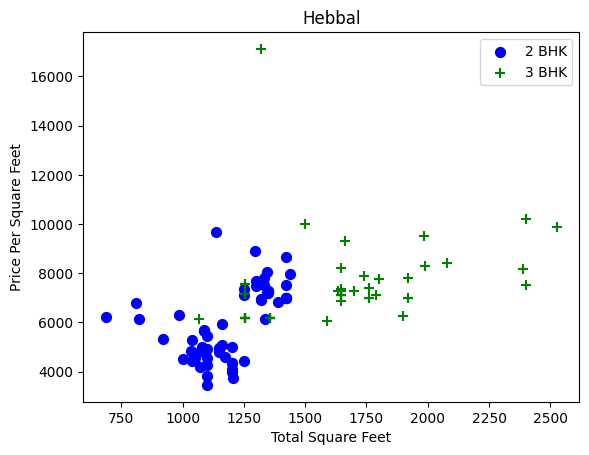

In [ ]:
plot_scatter_chart(df2,'Hebbal')
# Have removed most of the outliers

In [ ]:
# Look at the number of bathrooms
df2[df2.bath>=df2.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
84,EPIP Zone,1499.0,5.0,2.0,102.0,3,6804.536358,499.666667
209,Padmanabhanagar,1736.0,6.0,0.0,190.0,4,10944.700461,434.000000
337,Thigalarapalya,3122.0,6.0,2.0,230.0,4,7367.072389,780.500000
1068,2nd Stage Nagarbhavi,2400.0,8.0,3.0,450.0,6,18750.000000,400.000000
1202,Kanakpura Road,2689.0,6.0,2.0,220.0,4,8181.480104,672.250000
1478,Binny Pete,2465.0,5.0,2.0,234.0,3,9492.900609,821.666667
1881,Bannerghatta,3012.0,6.0,2.0,250.0,4,8300.132802,753.000000
1978,BTM 2nd Stage,1260.0,5.0,1.0,185.0,3,14682.539683,420.000000
2029,Thigalarapalya,3122.0,6.0,2.0,235.0,4,7527.226137,780.500000
2142,Bannerghatta,3012.0,6.0,2.0,268.0,4,8897.742364,753.000000


In [ ]:
df3 = df2[df2.bath<df2.bhk+2]

In [ ]:
df3

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,528.000000
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,480.000000
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,507.000000
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,600.000000
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605,696.250000
...,...,...,...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,2.0,47.00,2,3724.247227,631.000000
13313,Uttarahalli,1345.0,2.0,1.0,57.00,3,4237.918216,448.333333
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245,571.666667
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136,570.500000


In [ ]:
df3.drop(['sqft_per_bedroom','price_per_sqft'],axis='columns',inplace=True)

<ipython-input-60-6af7d75e30e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['sqft_per_bedroom','price_per_sqft'],axis='columns',inplace=True)


In [ ]:
df3

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
11,Whitefield,2785.0,5.0,3.0,295.00,4
...,...,...,...,...,...,...
13312,Bellandur,1262.0,2.0,2.0,47.00,2
13313,Uttarahalli,1345.0,2.0,1.0,57.00,3
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2


<ipython-input-62-89acca6fd9d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bhk", y="price", data=df3, palette="Set3", width=0.6)


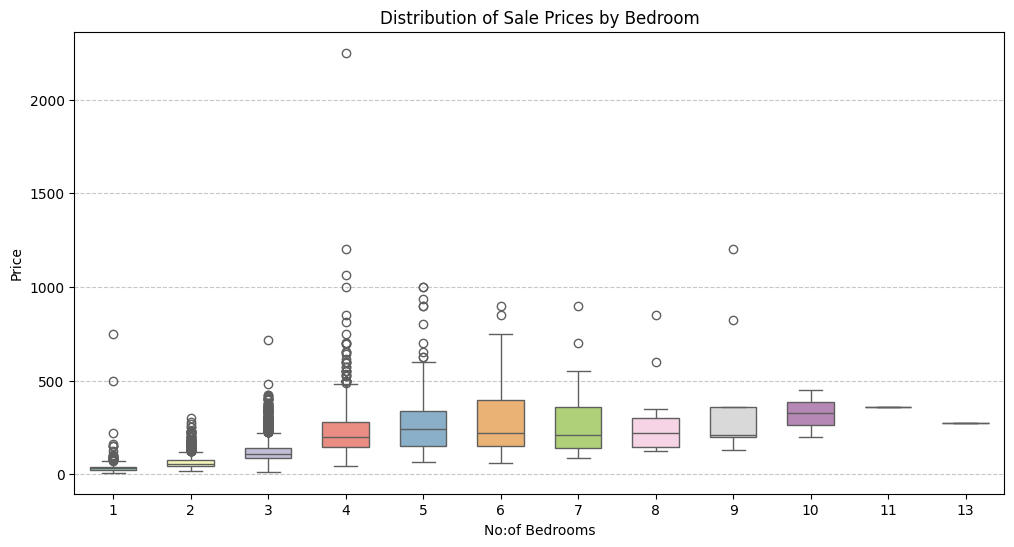

In [ ]:

fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with customizations
sns.boxplot(x="bhk", y="price", data=df3, palette="Set3", width=0.6)

# Adding labels and a title
plt.xlabel('No:of Bedrooms')
plt.ylabel('Price')
plt.title('Distribution of Sale Prices by Bedroom')

# Customize the gridlines
ax.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()

In [ ]:
df3.dtypes

,0
location,object
total_sqft,float64
bath,float64
balcony,float64
price,float64
bhk,int64


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define transformers for numerical and categorical columns
# Tranformers are used for natural language processing
numerical_transformer=Pipeline(steps=[("impute",SimpleImputer(strategy="mean")),("scaler",StandardScaler())])
#imputer is basically  attributing and imputing a column would fill up any NaN values in the column (this is part of  preprocesing)
#standard scaller is used to normally distribute data and also a model learns better when you SCALE down all the feautures into a single measuring unit
categorical_transformer=Pipeline(steps=[("impute",SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore",sparse_output=False))])


#Seperating categorical and numerical columns
categorical_columns=df3.select_dtypes(include=["object","category"]).columns
numerical_columns=df3.select_dtypes(include=["int64","float64"]).columns
#remove dependent variable from numerical column
numerical_columns=numerical_columns.drop("price")


#Combine transformers using ColumnTransformer
# ColumnTransformer is used to apply different preprocessing to different columns
preprocessor=ColumnTransformer(transformers=[("num",numerical_transformer,numerical_columns),("cat",categorical_transformer,categorical_columns)],remainder="passthrough")


# create pipeline for preprocessor
pipeline=Pipeline(steps=[("preprocessor",preprocessor)])



In [ ]:
categorical_columns

Index(['location'], dtype='object')

In [ ]:
numerical_transformer

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [ ]:
categorical_transformer

Pipeline(steps=[('impute',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['total_sqft', 'bath', 'balcony', 'bhk'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['location'], dtype='object'))]))])

In [ ]:
# Now apply the pipeline to your dataset
X=df3.drop("price",axis=1)
y=np.log(df3["price"]) # Normalize the dependent variable
X_preprocessed=pipeline.fit_transform(X)

In [ ]:
pipeline.fit_transform(X)
with open('pipeline.pickle', 'wb') as f:
    pickle.dump(pipeline, f)

In [ ]:
X.columns

Index(['location', 'total_sqft', 'bath', 'balcony', 'bhk'], dtype='object')

In [ ]:
X_preprocessed[0]

array([-0.60715511, -0.47358713, -0.67713867, -0.5674898 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

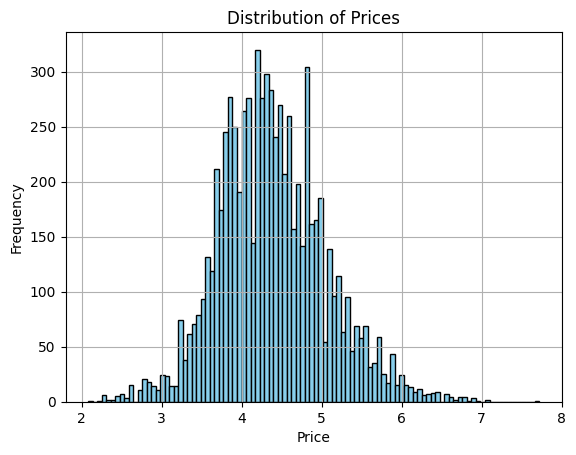

In [ ]:
# We can see that taking log of price made its distribution better
plt.hist(y, bins=100, edgecolor='black', color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_preprocessed,y,test_size=0.2,random_state=42)

In [ ]:
X.columns

Index(['location', 'total_sqft', 'bath', 'balcony', 'bhk'], dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7872757284009666

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X_preprocessed, y, cv=cv)

array([0.79335197, 0.7817767 , 0.7739551 , 0.76526182, 0.7567299 ])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(),
            'params': {
                "n_estimators":[100,200,500],
                "max_depth":[None,10,20,30],
                "min_samples_split":[2,5,10]
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False,n_jobs=-1) #n_jobs=-1 for cpu parallel processing
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


model_list = find_best_model_using_gridsearchcv(X_preprocessed,y)

In [ ]:
# @title Try this for GPU
import itertools
import pandas as pd
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.linear_model import Lasso as cuLasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

def find_best_model_using_gridsearchcv_cuml(X, y):
    algos = {
        'RandomForest': {
            'model': cuRF,
            'params': {
                "n_estimators": [100, 200, 500],
                "max_depth": [None, 10, 20, 30],
                "min_samples_split": [2, 5, 10]
            }
        },
        'lasso': {
            'model': cuLasso,
            'params': {
                'alpha': [0.01, 0.1, 1, 10],  # Regularization strength
                'max_iter': [1000, 2000]      # Maximum number of iterations
            }
        }
    }

    scores = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        # Get all parameter combinations
        param_combinations = list(itertools.product(*config['params'].values()))
        param_names = list(config['params'].keys())

        best_score = float('inf')  # Set to high value initially
        best_params = None

        # Iterate through all parameter combinations
        for param_combination in param_combinations:
            params = dict(zip(param_names, param_combination))

            # Initialize the model with the current parameter combination
            model = config['model'](**params)

            # Train the model
            model.fit(X_train, y_train)

            # Predict and calculate performance
            y_pred = model.predict(X_test)
            score = mean_squared_error(y_test, y_pred)

            # Track best model based on lowest score (MSE)
            if score < best_score:
                best_score = score
                best_params = params

        # Append the results for the current model
        scores.append({
            'model': algo_name,
            'best_score': np.sqrt(best_score),  # RMSE for better interpretation
            'best_params': best_params
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage:
model_list2 = find_best_model_using_gridsearchcv_cuml(X_preprocessed, y)
print(model_list2)


In [ ]:
model_list

In [ ]:
model_list.best_params.values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=None,random_state=0,min_samples_split=10,n_estimators=500)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8241224132874378

In [ ]:
def predict_price(location,sqft,bath,bhk,balcony):
  input_data = {
    'location': location,
    'total_sqft': sqft,
    'bath': bath,
    'balcony': balcony,
    'bhk': bhk}

  df_input = pd.DataFrame([input_data], columns=['location', 'total_sqft', 'bath', 'balcony', 'bhk'])

  preprocessed_data = pipeline.transform(df_input)
  prediction = model.predict(preprocessed_data)
  prediction = np.exp(prediction)

  return prediction

In [ ]:
predict_price('1st Phase JP Nagar',1000,2,2,1)

array([58.54984472])

In [ ]:
predict_price('Bellandur',1500,2,2,1)

array([84.40012875])

In [ ]:
predict_price('Indira Nagar',3200,8,8,1)

array([454.28171528])

In [ ]:
print(f"price for small space when balcony is 0 :{predict_price('Indira Nagar',500,1,1,0)}")

print('\n')

print(f"price for small space when balcony is 1 :{predict_price('Indira Nagar',500,1,1,1)}")

In [ ]:
print(f"price for big space when balcony is 0 :{predict_price('Indira Nagar',2000,3,3,0)}")

print('\n')

print(f"price for big space when balcony is 1 :{predict_price('Indira Nagar',2000,3,3,1)}")

In [ ]:
df3.loc[df3.location=='Indira Nagar']

In [ ]:
# From inference I realise that the balcony column is not contributing much for a small sqft house but does contribute for higher sqft

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
plt.figure(figsize=(10, 8))
test_df = df3.drop('location', axis=1)
corr_matrix = test_df.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of df3")
plt.show()


# Notice how balcony has a weak correlation with every other column

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
  pickle.dump(model,f)

In [ ]:
print('a')

In [ ]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))